In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [4]:
house_df = pd.read_csv('C:/Users/dines/OneDrive - JK LAKSHMIPAT UNIVERSITY/Desktop/AI & ML/ML/Lab_Assignment_2/House_Rent_Dataset.csv')
House_df = pd.DataFrame(house_df)
House_df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [5]:
main_shuffled = House_df.sample(frac=1,random_state=42) 
main_shuffled

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1566,2022-06-23,2,16000,1100,2 out of 4,Super Area,"Jaya Nagar Block 7, Jayanagar",Bangalore,Unfurnished,Bachelors/Family,2,Contact Owner
3159,2022-05-12,2,12000,800,2 out of 3,Super Area,Manikandan Nagar,Chennai,Furnished,Bachelors/Family,2,Contact Owner
538,2022-05-10,2,28000,518,5 out of 12,Carpet Area,Bhandup West,Mumbai,Semi-Furnished,Bachelors/Family,2,Contact Owner
2630,2022-06-08,3,8000,1500,1 out of 1,Carpet Area,Cherlopalli TIRUPATI,Delhi,Unfurnished,Bachelors/Family,3,Contact Owner
4418,2022-07-06,3,46000,2235,Ground out of 10,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Family,5,Contact Agent
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,2022-06-29,3,25000,1500,1 out of 2,Carpet Area,"Ayodhya Nagar, Quthbullapur",Hyderabad,Semi-Furnished,Family,3,Contact Owner
466,2022-06-13,3,20000,1200,3 out of 3,Super Area,Bansdroni,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
3092,2022-07-06,2,20000,800,13 out of 17,Carpet Area,Vadapalani,Chennai,Semi-Furnished,Family,2,Contact Agent
3772,2022-05-17,3,85000,3500,Ground out of 1,Carpet Area,T Nagar,Chennai,Semi-Furnished,Bachelors/Family,3,Contact Agent


In [6]:
testing = main_shuffled.tail(1000)
testing
#test data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
2467,2022-05-06,3,40000,1650,1 out of 3,Carpet Area,Dakshini Pitampura,Delhi,Semi-Furnished,Bachelors/Family,2,Contact Owner
1645,2022-05-27,2,12000,950,1 out of 2,Super Area,Nri Layout,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
3417,2022-05-20,2,5000,800,Ground out of 2,Super Area,Ayappakkam,Chennai,Unfurnished,Bachelors/Family,2,Contact Owner
3476,2022-05-09,3,10000,1000,1 out of 8,Carpet Area,"Kelambakkam, Old Mahabalipuram Road",Chennai,Semi-Furnished,Bachelors/Family,3,Contact Owner
3941,2022-06-10,4,25000,1815,2 out of 5,Super Area,Old Bowenpally,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,2022-06-29,3,25000,1500,1 out of 2,Carpet Area,"Ayodhya Nagar, Quthbullapur",Hyderabad,Semi-Furnished,Family,3,Contact Owner
466,2022-06-13,3,20000,1200,3 out of 3,Super Area,Bansdroni,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
3092,2022-07-06,2,20000,800,13 out of 17,Carpet Area,Vadapalani,Chennai,Semi-Furnished,Family,2,Contact Agent
3772,2022-05-17,3,85000,3500,Ground out of 1,Carpet Area,T Nagar,Chennai,Semi-Furnished,Bachelors/Family,3,Contact Agent


In [7]:
training = main_shuffled.drop(testing.index)
training

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1566,2022-06-23,2,16000,1100,2 out of 4,Super Area,"Jaya Nagar Block 7, Jayanagar",Bangalore,Unfurnished,Bachelors/Family,2,Contact Owner
3159,2022-05-12,2,12000,800,2 out of 3,Super Area,Manikandan Nagar,Chennai,Furnished,Bachelors/Family,2,Contact Owner
538,2022-05-10,2,28000,518,5 out of 12,Carpet Area,Bhandup West,Mumbai,Semi-Furnished,Bachelors/Family,2,Contact Owner
2630,2022-06-08,3,8000,1500,1 out of 1,Carpet Area,Cherlopalli TIRUPATI,Delhi,Unfurnished,Bachelors/Family,3,Contact Owner
4418,2022-07-06,3,46000,2235,Ground out of 10,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Family,5,Contact Agent
...,...,...,...,...,...,...,...,...,...,...,...,...
1854,2022-05-11,2,8900,1100,1 out of 2,Super Area,Sarjapur Road,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
4248,2022-06-22,2,12500,1200,2 out of 5,Super Area,Kompally,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
2872,2022-05-30,2,20000,950,2 out of 3,Carpet Area,"Geeta Colony PRWS Block 3 And 7, Rajgarh Colony",Delhi,Semi-Furnished,Bachelors/Family,2,Contact Owner
3030,2022-05-12,2,14000,1000,1 out of 3,Super Area,Kanathur Reddikuppam,Chennai,Unfurnished,Bachelors/Family,2,Contact Owner


In [8]:
p = lambda x : x/100
p20 = p(20)

twn = int(len(training)*p20)
print(twn)

749


In [9]:
validation = training.tail(twn)
validation

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4511,2022-05-12,2,7000,800,Ground out of 1,Super Area,Rampally,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
3537,2022-04-30,3,35000,1850,2 out of 3,Carpet Area,Thoraipakkam,Chennai,Semi-Furnished,Bachelors,3,Contact Owner
2043,2022-07-07,1,25000,420,17 out of 18,Carpet Area,Haralur Road,Bangalore,Semi-Furnished,Bachelors,1,Contact Agent
2848,2022-06-06,4,110000,3000,2 out of 4,Carpet Area,Safdarjung Enclave,Delhi,Semi-Furnished,Bachelors,5,Contact Agent
4310,2022-06-18,2,10000,1197,Ground out of 2,Super Area,Dammaiguda,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
1854,2022-05-11,2,8900,1100,1 out of 2,Super Area,Sarjapur Road,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
4248,2022-06-22,2,12500,1200,2 out of 5,Super Area,Kompally,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
2872,2022-05-30,2,20000,950,2 out of 3,Carpet Area,"Geeta Colony PRWS Block 3 And 7, Rajgarh Colony",Delhi,Semi-Furnished,Bachelors/Family,2,Contact Owner
3030,2022-05-12,2,14000,1000,1 out of 3,Super Area,Kanathur Reddikuppam,Chennai,Unfurnished,Bachelors/Family,2,Contact Owner


In [10]:
training_check = training.drop(validation.index)
training_check

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1566,2022-06-23,2,16000,1100,2 out of 4,Super Area,"Jaya Nagar Block 7, Jayanagar",Bangalore,Unfurnished,Bachelors/Family,2,Contact Owner
3159,2022-05-12,2,12000,800,2 out of 3,Super Area,Manikandan Nagar,Chennai,Furnished,Bachelors/Family,2,Contact Owner
538,2022-05-10,2,28000,518,5 out of 12,Carpet Area,Bhandup West,Mumbai,Semi-Furnished,Bachelors/Family,2,Contact Owner
2630,2022-06-08,3,8000,1500,1 out of 1,Carpet Area,Cherlopalli TIRUPATI,Delhi,Unfurnished,Bachelors/Family,3,Contact Owner
4418,2022-07-06,3,46000,2235,Ground out of 10,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Family,5,Contact Agent
...,...,...,...,...,...,...,...,...,...,...,...,...
3425,2022-06-25,2,10000,800,1 out of 2,Carpet Area,Tambaram East,Chennai,Unfurnished,Family,2,Contact Owner
1576,2022-05-27,4,180000,2800,Ground out of 4,Carpet Area,"Sarakki Nagar, J P Nagar",Bangalore,Furnished,Family,4,Contact Agent
3607,2022-07-10,1,15000,550,9 out of 15,Carpet Area,Iyyappanthangal,Chennai,Semi-Furnished,Bachelors/Family,1,Contact Agent
213,2022-04-24,3,12000,1000,Ground out of 1,Super Area,Khardah,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner


number of rows in training, validation and test sets, along with the structure, datatypes and value counts of the dataframes.

In [11]:
print(training_check.dtypes)
print("The number of rows and columns are :",len(training_check),",",len(training_check.columns))

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object
The number of rows and columns are : 2997 , 12


In [12]:
print(testing.dtypes)
print("The number of rows and columns are :",len(testing),",",len(testing.columns))

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object
The number of rows and columns are : 1000 , 12


In [13]:
print(validation.dtypes)
print("The number of rows and columns are :",len(validation),",",len(validation.columns))

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object
The number of rows and columns are : 749 , 12


# Data Cleaning:

Analyse the data and identify which columns are not relevant for house rent prediction task. Drop those columns from the dataframes.

In [14]:
training_check.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1566,2022-06-23,2,16000,1100,2 out of 4,Super Area,"Jaya Nagar Block 7, Jayanagar",Bangalore,Unfurnished,Bachelors/Family,2,Contact Owner
3159,2022-05-12,2,12000,800,2 out of 3,Super Area,Manikandan Nagar,Chennai,Furnished,Bachelors/Family,2,Contact Owner
538,2022-05-10,2,28000,518,5 out of 12,Carpet Area,Bhandup West,Mumbai,Semi-Furnished,Bachelors/Family,2,Contact Owner
2630,2022-06-08,3,8000,1500,1 out of 1,Carpet Area,Cherlopalli TIRUPATI,Delhi,Unfurnished,Bachelors/Family,3,Contact Owner
4418,2022-07-06,3,46000,2235,Ground out of 10,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Family,5,Contact Agent
4679,2022-06-13,2,17000,1050,3 out of 3,Carpet Area,Old Nallakunta,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Agent
1181,2022-06-04,2,57000,625,9 out of 18,Carpet Area,"Panch Complex, Powai",Mumbai,Furnished,Bachelors,2,Contact Agent
1957,2022-05-23,2,9500,700,2 out of 6,Super Area,Varthur,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
1344,2022-06-22,4,400000,2500,5 out of 12,Carpet Area,Bandra West,Mumbai,Furnished,Bachelors/Family,4,Contact Agent
3410,2022-05-12,2,15000,650,2 out of 3,Super Area,Ponniammanmedu,Chennai,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [15]:
training_main = training_check.drop(['Posted On','Floor','Area Locality','Tenant Preferred'],axis=1)

Check for missing values and logically impute the dataset.

In [16]:
print("FOR NA VALUE:\n",training_main.isna().sum(),'\n')
print("FOR NULL VALUE:\n",training_main.isnull().sum(),'\n')
print("There is no null value and no Na Values, therefore there is no need of logical imputation")

FOR NA VALUE:
 BHK                  0
Rent                 0
Size                 0
Area Type            0
City                 0
Furnishing Status    0
Bathroom             0
Point of Contact     0
dtype: int64 

FOR NULL VALUE:
 BHK                  0
Rent                 0
Size                 0
Area Type            0
City                 0
Furnishing Status    0
Bathroom             0
Point of Contact     0
dtype: int64 

There is no null value and no Na Values, therefore there is no need of logical imputation


Identify any categorical valued columns (non-numeric) and convert them to numeric.

In [17]:
training_main['Furnishing Status'].replace(['Semi-Furnished','Unfurnished','Furnished'],[1,0,2],inplace=True)
training_main['Area Type'].replace(['Super Area','Carpet Area'],[0,1],inplace=True)
training_main['Point of Contact'].replace(['Contact Owner','Contact Agent'],[0,1],inplace=True)
training_main

,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom,Point of Contact
1566,2,16000,1100,0,Bangalore,0,2,0
3159,2,12000,800,0,Chennai,2,2,0
538,2,28000,518,1,Mumbai,1,2,0
2630,3,8000,1500,1,Delhi,0,3,0
4418,3,46000,2235,1,Hyderabad,0,5,1
...,...,...,...,...,...,...,...,...
3425,2,10000,800,1,Chennai,0,2,0
1576,4,180000,2800,1,Bangalore,2,4,1
3607,1,15000,550,1,Chennai,1,1,1
213,3,12000,1000,0,Kolkata,0,2,0


# Exploratory Analysis (On training set):

Plot the house rents against the dependent variable of “size”. See if there is a uniform linear trend between the dependent and independent variables. Make accurate axis and legend. Save the plot in a png file.

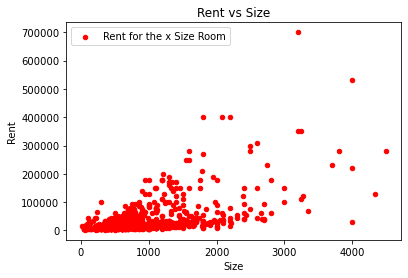

In [18]:
df = training_main[['Size','Rent']]
df=df.tail(1000)
df.plot(kind='scatter',x='Size',y='Rent',color='red')
plt.title('Rent vs Size')
plt.legend(["Rent for the x Size Room"])
plt.show()

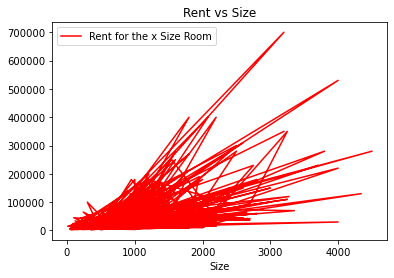

In [19]:
df = training_main[['Size','Rent']]
df=df.tail(1000)
df.plot(x='Size',y='Rent',color='red')
plt.title('Rent vs Size')
plt.legend(["Rent for the x Size Room"])
plt.show()

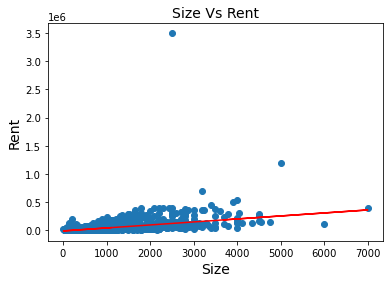

In [20]:
X = training_main.iloc[:, 2].values.reshape(-1, 1)  # values converts it into a numpy array
Y = training_main.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, 
#but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title('Size Vs Rent', fontsize=14)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Rent', fontsize=14)
plt.savefig("img.png", bbox_inches='tight', dpi=600)
plt.show()


Find average rent prices in different cities and report which city has the highest average rent.

City
Bangalore    27184.751773
Chennai      21603.315596
Delhi        31175.809140
Hyderabad    19955.945652
Kolkata      11689.419825
Mumbai       82661.851852
Name: Rent, dtype: float64 

Mumbai city has the highest average rent with:  82661.85185185185


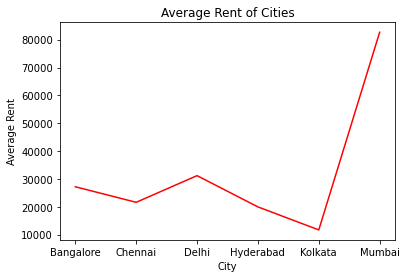

In [21]:
df1 = training_main[['Rent','City']]
m=df1.groupby(["City"],sort=True)['Rent'].mean()
print(m,'\n')
city_dict ={}
city_dict.update(m)
m.plot(color='red')
plt.title("Average Rent of Cities")
plt.ylabel("Average Rent")
for key, value in city_dict.items():
    if(value == m.max()):
        print(key,"city has the highest average rent with: ",value)

# Regression:

Train a linear regression model on the training set partition by taking only one dependent variable of
“size”. Calculate the error on the validation set.

In [22]:
train_part = training_main[['BHK','Rent','Bathroom']]
train_part

,BHK,Rent,Bathroom
1566,2,16000,2
3159,2,12000,2
538,2,28000,2
2630,3,8000,3
4418,3,46000,5
...,...,...,...
3425,2,10000,2
1576,4,180000,4
3607,1,15000,1
213,3,12000,2


In [23]:
model = LinearRegression()
model.fit(train_part,training_main['Size'])

LinearRegression()

In [24]:
test_prediction = model.predict(validation[['BHK','Rent','Bathroom']])
df2 = pd.DataFrame(data=test_prediction,columns=["Predicted Size"])
df2 #print test prediction

,Predicted Size
0,930.526320
1,1522.600869
2,377.339677
3,2414.521390
4,933.062488
...,...
744,932.132560
745,935.175961
746,941.516380
747,936.444045


In [25]:
df3 = training_main[['Size']].head(1000)
df3

,Size
1566,1100
3159,800
538,518
2630,1500
4418,2235
...,...
4348,1000
599,696
2313,600
3473,1400


In [26]:
df3Idx=df3.index.values
df2Idx=df2.index.values

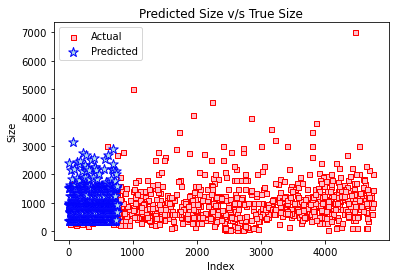

In [27]:
plt.scatter(y=df3['Size'],x=df3Idx,c="pink",linewidths=1,marker="s",edgecolor="red",s=25)
plt.scatter(y=df2['Predicted Size'],x=df2Idx,c="lightblue",linewidths=1,marker="*",edgecolor="blue",s=100)
plt.title("Predicted Size v/s True Size")
plt.legend(['Actual','Predicted'])
plt.xlabel("Index")
plt.ylabel("Size")
plt.show()

In [28]:
mae = mean_absolute_error(validation['Size'],test_prediction)
print("MAE: ",mae)
mse = mean_squared_error(validation['Size'],test_prediction)
print("MSE: ",mse)

MAE:  254.30581420932197
MSE:  132336.96995481066


In [29]:
rmse = np.sqrt(mse)
print("RMSE: ",rmse)

RMSE:  363.7814865476398


Plot the model predictions of rent values alongside the actual rent values taken for the validation set.
Show the legend, axes and color-coded predictions and ground truth for differentiating.

In [30]:
train_part1 = training_main[['BHK','Size','Bathroom']]
train_part1

,BHK,Size,Bathroom
1566,2,1100,2
3159,2,800,2
538,2,518,2
2630,3,1500,3
4418,3,2235,5
...,...,...,...
3425,2,800,2
1576,4,2800,4
3607,1,550,1
213,3,1000,2


In [31]:
model = LinearRegression()
model.fit(train_part1,training_main['Rent'])

LinearRegression()

In [32]:
test_prediction = model.predict(validation[['BHK','Size','Bathroom']])
# print(test_prediction)
df2 = pd.DataFrame(data=test_prediction,columns=["Predicted Rent"])
df2

,Predicted Rent
0,31445.263656
1,85961.804222
2,-2246.906715
3,170250.749668
4,43784.480025
...,...
744,40769.608519
745,43877.723474
746,36107.436088
747,37661.493565


In [33]:
df3=training_main[['Rent']].head(1000)
df3

,Rent
1566,16000
3159,12000
538,28000
2630,8000
4418,46000
...,...
4348,10000
599,55000
2313,12500
3473,22000


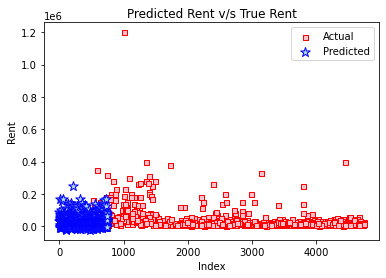

In [34]:
plt.scatter(y=df3['Rent'],x=df3Idx,c="pink",linewidths=1,marker="s",edgecolor="red",s=25)
plt.scatter(y=df2['Predicted Rent'],x=df2Idx,c="lightblue",linewidths=1,marker="*",edgecolor="blue",s=100)
plt.title("Predicted Rent v/s True Rent")
plt.legend(['Actual','Predicted'])
plt.xlabel("Index")
plt.ylabel("Rent")
plt.show()

In [35]:
mae = mean_absolute_error(validation['Rent'],test_prediction)
print("MAE: ",mae)
mse = mean_squared_error(validation['Rent'],test_prediction)
print("MSE: ",mse)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)

MAE:  28270.661284711216
MSE:  2547928390.2598577
RMSE:  50477.00853121011


Create a function for calculating the RMSE values for the predictions Vs the actual ground truth rent
values. RMSE = SQRT( Σ ( (F(xi) - yi)2)/N ), Here F(x) are the prediction values, N are the number of rows.

In [36]:
RMSE = np.sqrt(mse)
RMSE

50477.00853121011

Train a logistic regression model and check the score for different training iterations. Plot the
validation results by varying max_iter as 10, 20, 30, ….

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [38]:
scaler = StandardScaler()
scaled_X_train= scaler.fit_transform(train_part)
scaled_X_test = scaler.transform(testing[['BHK','Rent','Bathroom']])

In [39]:
modelL = LogisticRegression()
modelL.fit(scaled_X_train,training_main['Size'])

C:\Users\dines\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
Lprediction=modelL.predict(scaled_X_test)
Lprediction

array([1000, 1000, 1000, 1200, 1500, 1000,  500, 1000, 1500,  600,  500,
       1000,  500,  500,  500,  500, 1000, 1800, 1500, 1500,  600, 1000,
        500, 1000, 1500, 1000, 1000,  500,  500,  500, 2500,  500, 1000,
       1000, 2800, 1000, 1000, 1500, 1000, 1000, 1000,  500, 1000, 1000,
       1000,  500, 1000, 1000, 1200, 1000,  500,  500, 1200, 1000, 1500,
       1000,  500,  500, 1000, 1200,  500,  500, 1000, 1000,  500,  500,
        800, 1800, 1000, 1500, 1000, 1200, 1000, 2000, 1000, 1200, 1500,
        600, 1000, 1000, 1500, 1000, 1500,  800, 1800,  500, 1000, 1500,
       1200, 1000,  500,  500, 1000,  500, 1000, 1000, 1000,  500, 1000,
       1000, 1200, 1000,  600,  500, 1500, 1000, 1000, 1000, 1200, 1500,
       1000,  500, 1000, 1000, 2500, 1000,  800,  500, 1500,  500, 1200,
       1500, 1000,  500, 1500, 1500, 1000,  500, 1000,  500, 1000, 1000,
       1000, 1000, 1200,  500,  500, 1500, 1800,  500, 1000, 1000, 1500,
       1500,  500,  500, 1000, 1000, 1000,  500, 20

Try to improve accuracy (on validation set) by considering more features and retraining.

In [41]:
modelL.score(scaled_X_train,training_main['Size'])

0.10276943610276944

Make predictions on the test set by taking 3 of your best models. Report these 3 accuracy values.